Text(0.5, 1.0, 'Training set')

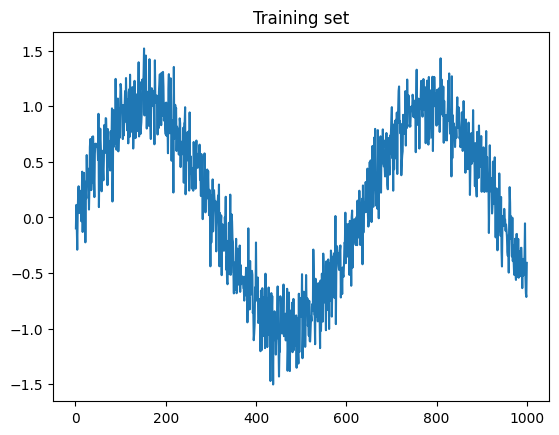

In [1]:
from lbm.datasets.noisy_sine import Prepocessor
from matplotlib import pyplot as plt

processor = Prepocessor()
train_loader, val_loader, test_loader = processor.get_loaders()

plt.plot(processor.train_set.x.numpy(), processor.train_set.y.numpy())
plt.title('Training set')

/Users/jamescataldo/Code/letsbuildmodels/modelenv/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/jamescataldo/Code/letsbuildmodels/modelenv/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


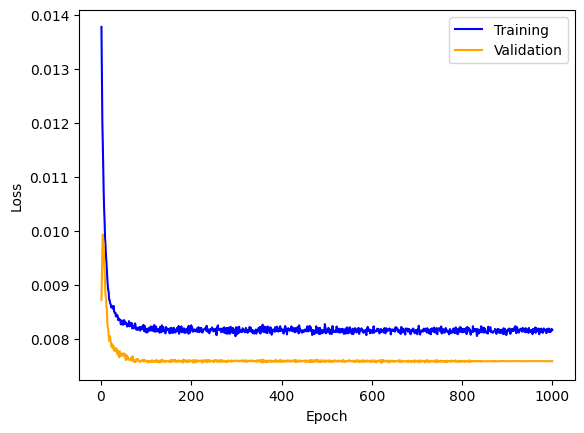

In [21]:
from lbm.models import MultiInLinearNormalized
from lbm.workflow import train_and_validate
from torch.optim import Adam
from torch.nn import MSELoss


model = MultiInLinearNormalized(4)

def validate_model(model):
    optimizer = Adam(model.parameters())
    loss_fn = MSELoss()
    train_losses, val_losses = train_and_validate(model, train_loader, val_loader, optimizer, loss_fn, epochs=1000)
    plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
    plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

validate_model(model)